# Assignment 10

### 1.复习上课内容

### 2. 回答一下理论题目

#### 1. What is independent assumption in Naive bayes ?

朴素贝叶斯是一个生成模型，对于每一种分类，它都可以生成一个后验概率

$h_{y=y_0, MAP}\\=\arg\max_{h\in H}P(y=y_0|a_1,a_2,a_3,...)\\=\arg\max_{h\in H}\frac{P(a_1,a_2,a_3,...|y=y_0)\cdot P(y=y_0)}{P(a_1,a_2,...)}\\=\arg\max_{h\in H}{P(a_1,a_2,a_3,...|y=y_0)\cdot P(y=y_0)}\\=\arg\max_{h\in H}{P(a_1|y_0)\cdot P(a_2|y_0)\cdot P(a_3|y_0)\cdots P(y=y_0)} (According to "Naive"hypothesis)$

然后我们同样可以求出$h_{y=y_1}$, $h_{y=y_2}$, ...。最后y的估计值就是使h得到最大值所对于的y值。

其中，朴素指的就是变量之间相互独立的假设，简化了模型，使得最后一步可以很容易的求出



#### 2. What is MAP(maximum a posterior) and ML(maximum likelihood) ?

$h_{MAP}=\arg\max_{h\in H}P(h|D)=\arg\max_{h\in H}P(D|h)P(h)$

$h_{ML}=\arg\max_{h\in H}P(D|h)$

where D is short for Data, H is the set of Hypothesises, h is a particular function in the hypothesises

简单解释：

- 在极大后验概率情况下，Data已经发生，我们需要求一个最佳h，它对数据的拟合情况最好（生成概率最大），则这个h就是最佳h
- 在极大似然的情况下，我们要求一个h，使得在这个h下，我们取得观测数据D的概率最大，则这个h是最佳h

#### 3. What is support vector in SVM?

在线性可分的情况下，训练数据集的样本点中与分离超平面距离最近的样本点的实例称为支持向量（support vector）。

支持向量是使约束条件式 $y_i(w\cdot x_i + b)-1\geq 0\quad i=1,2,\cdots,N$ 等号成立的点，即：

$y_i(w\cdot x_i + b)-1 = 0$

对于$y_i=+1$的正例点，支持向量在超平面 $HyperPlane_1:w\cdot x+b=1$ 上，

对于$y_i=-1$的正例点，支持向量在超平面 $HyperPlane_2:w\cdot x+b=-1$ 上。

#### 4. What is the intuition behind SVM ?

SVM的原理是，通过找到一个超平面，把数据中的正例和反例切分开来，并且使得正例和反例中离平面最近的数据点，到平面的距离最大化，则这个切分平面就是最佳分割。

如果数据线性不可分，则可通过修改**硬间隔最大化**为**软间隔最大化**，使之能够被线性分割。（软间隔最大化）

如果数据的问题是非线性问题，则可通过 **Kernal Trick**，将数据打到高维，然后转换为线性可分的问题。（非线性支持向量机）


#### 5. Shortly describ what 'random' means in random forest ?

- 样本随机取得（bootstrap）
- 特征随机取得（每棵树只选取一部分特征来做分类）

#### 6. What criterion does XGBoost use to find the best split point in a tree ?

**To split：**枚举所有不同树结构，贪心算法

**To find best split：**Loss function + Regularization：$Obj=\sum_{i=1}^{n}l(y_i, \hat{y}_i)+\sum_{k=1}^{K}\Omega(f_k)$

其中：$l$为loss；$\Omega$为正则化项，表示树的复杂度

$\Omega(f)=\gamma T+\frac{1}{2}\lambda\sum_{j=1}^{T}w_j^{2}$，$T$代表叶子节点的个数，$w$代表叶子节点的分数，分别由$\gamma$和$\lambda$控制。

### 3. Practical part

##### Problem description: In this part you are going to build a classifier to detect if a piece of news is published by the Xinhua news agency (新华社）.

#### Hints:

###### 1. Firstly, you have to come up with a way to represent the news. (Vectorize the sentence, you can find different ways to do so online)  

Read data

In [1]:
import re
import pandas as pd
df = pd.read_csv('C:/Users/yihua/学习/开课吧NLP_course/my/Project01/content/raw_news/sqlResult_1558435.csv', encoding="ANSI")

**查找后发现新华社新闻有不同标签:**

In [2]:
for i in set(df.loc[:, 'source'].dropna()):
    if re.findall(r'新华社', i):
        print(i)

新华社@
新华社@http://tech.163.com/17/0619/15/CNA7J2EJ00097U7T.html
新华社
新华社新媒体专线
新华社@http://tech.huanqiu.com/intelligent/2017-06/10868069.html?qq-pf-to=pcqq.c2c


**提取训练数据**

In [3]:
df = df[["title", "content", "source"]].dropna(axis=0, how='any')
X = list(df["content"])
y = list(df["source"])
y = [re.findall(r'新华社', i) and 1 or 0 for i in y]       # 是新华社就是1，不是就是0
len(X), len(y), y[:10]

(87052, 87052, [0, 0, 0, 1, 0, 0, 0, 0, 0, 0])

**把y清洗一下，变成one-hot**

In [4]:
from sklearn.preprocessing import OneHotEncoder
import numpy as np

y = np.array(y).reshape(-1, 1)
y

array([[0],
       [0],
       [0],
       ...,
       [1],
       [1],
       [1]])

In [5]:
enc = OneHotEncoder()
y = enc.fit_transform(y).toarray()
y

C:\Users\yihua\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [0., 1.],
       [0., 1.],
       [0., 1.]])

**可以看到类别不均衡**

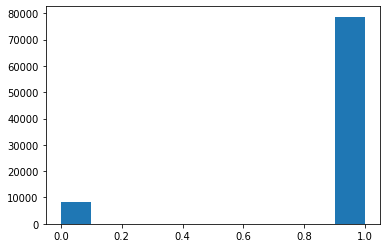

In [6]:
import matplotlib.pyplot as plt
plt.hist([int(i[1]) for i in y]);

**大部分都是新华社的，少部分不是**

**清洗X**

In [7]:
from hanziconv import HanziConv
import jieba

def get_stopwords(path='stopwords.txt', punctuations=True, bookmarks=False, text_stopwords=True):
    '''
    加载停用词表，去掉一些噪声
    punctions是否作为停用词，是停用词为False（不保留），要保留在语料里为True
    bookmarks是否作为停用词，是停用词为False（不保留），要保留在语料里为True
    text_stopwords是否作为停用词，是停用词为False（不保留）, 要保留在语料里为True
    :return: 停用词集合
    '''
    # 加载停用词表
    stopword_set = set()
    with open(path, 'r', encoding="utf-8") as stopwords:  # stopwords.txt停用词表，我放在同一目录下
        for stopword in stopwords:
            stopword_set.add(stopword.strip("\n"))
    stopword_set = set([i.strip() for i in stopword_set])
    if punctuations == True: [stopword_set.remove(i) for i in ["！","!","，",",","。",".","：","；",";",":","？","?"]];
    if bookmarks == True: [stopword_set.remove(i) for i in ["《","》"]];
    if text_stopwords == True: [stopword_set.remove(i) for i in set(["第二","一番","一直","一个","一些","许多","种","有的是","也就是说","末##末","啊","阿","哎","哎呀","哎哟","唉","俺","俺们","按","按照","吧","吧哒","把","罢了","被","本","本着","比","比方","比如","鄙人","彼","彼此","边","别","别的","别说","并","并且","不比","不成","不单","不但","不独","不管","不光","不过","不仅","不拘","不论","不怕","不然","不如","不特","不惟","不问","不只","朝","朝着","趁","趁着","乘","冲","除","除此之外","除非","除了","此","此间","此外","从","从而","打","待","但","但是","当","当着","到","得","的","的话","等","等等","地","第","叮咚","对","对于","多","多少","而","而况","而且","而是","而外","而言","而已","尔后","反过来","反过来说","反之","非但","非徒","否则","嘎","嘎登","该","赶","个","各","各个","各位","各种","各自","给","根据","跟","故","故此","固然","关于","管","归","果然","果真","过","哈","哈哈","呵","和","何","何处","何况","何时","嘿","哼","哼唷","呼哧","乎","哗","还是","还有","换句话说","换言之","或","或是","或者","极了","及","及其","及至","即","即便","即或","即令","即若","即使","几","几时","己","既","既然","既是","继而","加之","假如","假若","假使","鉴于","将","较","较之","叫","接着","结果","借","紧接着","进而","尽","尽管","经","经过","就","就是","就是说","据","具体地说","具体说来","开始","开外","靠","咳","可","可见","可是","可以","况且","啦","来","来着","离","例如","哩","连","连同","两者","了","临","另","另外","另一方面","论","嘛","吗","慢说","漫说","冒","么","每","每当","们","莫若","某","某个","某些","拿","哪","哪边","哪儿","哪个","哪里","哪年","哪怕","哪天","哪些","哪样","那","那边","那儿","那个","那会儿","那里","那么","那么些","那么样","那时","那些","那样","乃","乃至","呢","能","你","你们","您","宁","宁可","宁肯","宁愿","哦","呕","啪达","旁人","呸","凭","凭借","其","其次","其二","其他","其它","其一","其余","其中","起","起见","起见","岂但","恰恰相反","前后","前者","且","然而","然后","然则","让","人家","任","任何","任凭","如","如此","如果","如何","如其","如若","如上所述","若","若非","若是","啥","上下","尚且","设若","设使","甚而","甚么","甚至","省得","时候","什么","什么样","使得","是","是的","首先","谁","谁知","顺","顺着","似的","虽","虽然","虽说","虽则","随","随着","所","所以","他","他们","他人","它","它们","她","她们","倘","倘或","倘然","倘若","倘使","腾","替","通过","同","同时","哇","万一","往","望","为","为何","为了","为什么","为着","喂","嗡嗡","我","我们","呜","呜呼","乌乎","无论","无宁","毋宁","嘻","吓","相对而言","像","向","向着","嘘","呀","焉","沿","沿着","要","要不","要不然","要不是","要么","要是","也","也罢","也好","一","一般","一旦","一方面","一来","一切","一样","一则","依","依照","矣","以","以便","以及","以免","以至","以至于","以致","抑或","因","因此","因而","因为","哟","用","由","由此可见","由于","有","有的","有关","有些","又","于","于是","于是乎","与","与此同时","与否","与其","越是","云云","哉","再说","再者","在","在下","咱","咱们","则","怎","怎么","怎么办","怎么样","怎样","咋","照","照着","者","这","这边","这儿","这个","这会儿","这就是说","这里","这么","这么点儿","这么些","这么样","这时","这些","这样","正如","吱","之","之类","之所以","之一","只是","只限","只要","只有","至","至于","诸位","着","着呢","自","自从","自个儿","自各儿","自己","自家","自身","综上所述","总的来看","总的来说","总的说来","总而言之","总之","纵","纵令","纵然","纵使","遵照","作为","兮","呃","呗","咚","咦","喏","啐","喔唷","嗬","嗯","嗳"])];
    return stopword_set

def split_sentence(document):
    '''
    this is to split a doc into sentences
    分句之前先把\n，\r，\r\n，\u3000直接洗掉即可
    分句的规则有：1.碰到句号，问号，感叹号，分号还有空格就分，并把标点符号加到前句
    '''
    document = document.strip().replace("\r", "").replace("\n", "").replace("\\n", "").replace("\u3000", "").replace("\\", "")
    # 以结尾标点切分
    splitted = re.split(r"([？?。!！；…])", document)
    # 标点符号加回句子
    splitted.append("")
    splitted = ["".join(i) for i in zip(splitted[0::2],splitted[1::2])]
    return [i for i in splitted if i != '']

def wash_and_split(input_text, punctuations=True, bookmarks=False, text_stopwords=True):
    '''
    主要的数据预处理函数
    输入一篇文章string
    输出分词分句并清洗后的句子列表，以备训练word2vec使用
    
    关于停用词见 get_stopwords 函数的注释
    '''
    if input_text == "": return [[""]]
    
    sentences = split_sentence(HanziConv.toSimplified(input_text))
    cutted = list(map(jieba.lcut, sentences))
    
    stopwds = get_stopwords(path='stopwords.txt', punctuations=punctuations, bookmarks=bookmarks, text_stopwords=text_stopwords)
    
    def remove_stopwords_for_each_sentence(list_of_words):
        for i, word in enumerate(list_of_words):
            if word in stopwds or word == " ":
                list_of_words.remove(list_of_words[i])
        return list_of_words
    
    cutted = map(remove_stopwords_for_each_sentence, cutted)
#   cutted = [i for i in list(cutted) if i != []]
    return [i for i in list(cutted) if i not in [[], ["…"]]]

In [8]:
X_splitted = []
for i, content in enumerate(X):
    X_splitted.append(wash_and_split(content, punctuations=False))
    print("\r{}/{}".format(i+1, len(X)), end='')

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\yihua\AppData\Local\Temp\jieba.cache
Loading model cost 1.608 seconds.
Prefix dict has been built succesfully.


87052/87052

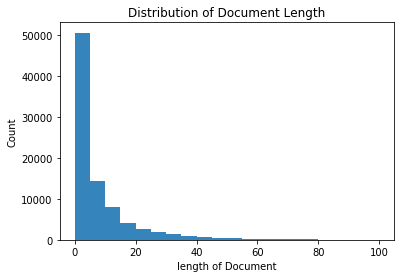

In [9]:
plt.hist([len(text) for text in X_splitted], np.arange(0,101,5), alpha=0.9);
plt.xlabel('length of Document');
plt.ylabel('Count');
plt.title('Distribution of Document Length');

有些content里有脏数据，把这些数据删掉

In [10]:
for i, text in enumerate(X_splitted):
    if len(text) == 0:
        print(i, text)

2304 []
5012 []
8756 []
9735 []
13056 []
13321 []
17463 []
17563 []
19935 []
21358 []
21445 []
21680 []
21697 []
22514 []
22515 []
22566 []
22971 []
22972 []
23199 []
23716 []
23994 []
24196 []
24614 []
24615 []
24842 []
24935 []
25343 []
25350 []
25369 []
25842 []
25889 []
26507 []
26508 []
26601 []
26931 []
27455 []
27464 []
28011 []
28045 []
28813 []
29147 []
29149 []
29150 []
29163 []
29169 []
29170 []
29183 []
29607 []
29888 []
30245 []
30246 []
30247 []
30248 []
30249 []
30250 []
30251 []
30252 []
30276 []
30278 []
30555 []
30776 []
31389 []
31390 []
31499 []
31500 []
31501 []
31502 []
31503 []
31504 []
31505 []
31506 []
31507 []
31508 []
31509 []
31510 []
31511 []
32436 []
32448 []
32697 []
32698 []
32699 []
32700 []
32701 []
32702 []
32707 []
32708 []
32709 []
32711 []
32712 []
32714 []
33408 []
33512 []
34118 []
34120 []
34949 []
35122 []
35237 []
35240 []
35241 []
36257 []
37903 []
37952 []
37953 []
37955 []
38924 []
38931 []
38986 []
39301 []
39341 []
39387 []
39648 []
40444

In [11]:
x1, y1 = [], []
for a, b in zip(X_splitted, y):
    if a:
        x1.append(a)
        y1.append(b)
len(x1), len(y1)

(86861, 86861)

**使用SIF构建句向量**

In [12]:
from SIF import *

In [13]:
model = word2vec.Word2Vec.load('C:/Users/yihua/学习/开课吧NLP_course/my/Project01/model/word2vec_v1.1.model')

In [14]:
# 把每篇评论合并成一句长句
x2 = []
def join(m):
    n = []
    for i in m:
        n.extend(i)
    return n
x2 = list(map(join, x1))

In [15]:
x_vectorized = SIF(x2, model)
# x_vectorized = []
# for j, i in enumerate(x2):
#     m = SIF([i], model);
#     x_vectorized.append(m)
#     print('\r{}/{}'.format(j, len(x2)), end='')

KeyboardInterrupt: 

In [25]:
y_vectorized = np.array(y1)

In [ ]:
x_vectorized.shape, y_vectorized.shape

In [23]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x_vectorized, y_vectorized, test_size=0.33, random_state=42)

In [ ]:
plt.hist([int(i[1]) for i in y_train]);
plt.hist([int(i[1]) for i in y_test]);

**另一种方法：使用词袋模型（TF-IDF）构建特征库**

In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [17]:
tfidf = TfidfVectorizer()

In [18]:
x22 = [" ".join(i) for i in x2]

In [19]:
x22[:2]

['此外 自 本周 6 月 12 日 起 除 小米 手机 6 等 15 款 机型 外 其余 机型 已 暂停 更新 发布 含 开发 版 体验版 内测 稳定版 暂不受 影响 ， 以 确保 工程师 可以 集中 全部 精力 进行 系统优化 工作 有人 猜测 这 也 是 将 精力 主要 用到 MIUI 9 的 研发 之中 MIUI 8 去年 5 月 发布 距今已有 一年 有余 也 是 时候 更新换代 了 当然 关于 MIUI 9 的 确切 信息 我们 还是 等待 官方消息',
 '骁龙 835 作为 唯一 通过 Windows 10 桌面 平台 认证 的 ARM 处理器 高通 强调 不会 因为 只 考虑 性能 而 去 屏蔽掉 小 核心 相反 他们 正 联手 微软 找到 一种 适合 桌面 平台 的 兼顾 性能 和 功耗 的 完美 方案 报道 称 微软 已经 拿到 了 一些 新 的 源码 以便 Windows 10 更好 地 理解 big little 架构 资料 显示 骁龙 835 作为 一款 集成 了 CPU GPU 基带 蓝牙 Wi Fi 的 SoC 比 传统 的 Wintel 方案 可以 节省 至少 30% 的 PCB 空间 按计划 今年 Q4 华硕 惠普 联想 将 首发 骁龙 835 Win10 电脑 预计 均 是 二合一 形态 的 产品 当然 高通 骁龙 只是 个 开始 未来 也许 还 能 见到 三星 Exynos 联发科 华为 麒麟 小米 澎湃 等 进入 Windows 10 桌面 平台']

In [20]:
x_vectorized_tfidf = tfidf.fit_transform(x22)

In [21]:
x_vectorized_tfidf.shape, x_vectorized_tfidf[0]

((86861, 244389), <1x244389 sparse matrix of type '<class 'numpy.float64'>'
 	with 47 stored elements in Compressed Sparse Row format>)

In [26]:
X_train_tfidf, X_test_tfidf, y_train_tfidf, y_test_tfidf = train_test_split(x_vectorized_tfidf, y_vectorized, test_size=0.33, random_state=48)

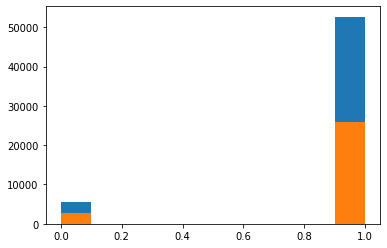

In [27]:
plt.hist([int(i[1]) for i in y_train_tfidf]);
plt.hist([int(i[1]) for i in y_test_tfidf]);

# 2. Secondly,  pick a machine learning algorithm that you think is suitable for this task

In [28]:
import xgboost as xgb

In [29]:
y_test = np.array([int(i[1]) for i in y_test])
y_train = np.array([int(i[1]) for i in y_train])

NameError: name 'y_test' is not defined

In [30]:
y_test_tfidf = np.array([int(i[1]) for i in y_test_tfidf])
y_train_tfidf = np.array([int(i[1]) for i in y_train_tfidf])

In [31]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

NameError: name 'X_train' is not defined

In [32]:
X_train_tfidf.shape, X_test_tfidf.shape, y_train_tfidf.shape, y_test_tfidf.shape

((58196, 244389), (28665, 244389), (58196,), (28665,))

In [33]:
# 加载数据为XGBoost的DMatrix类
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

NameError: name 'X_train' is not defined

In [34]:
dtrain_tfidf = xgb.DMatrix(X_train_tfidf, label = y_train_tfidf)
dtest_tfidf = xgb.DMatrix(X_test_tfidf, label = y_test_tfidf)

In [36]:
# 指标监控：train， test
# evallist=[(dtrain, 'train'), (dtest, 'evaluation')]
evallist_tfidf=[(dtrain_tfidf, 'train_tfidf'), (dtest_tfidf, 'evaluation_tfidf')]
# XGB模型参数
param = {'max_depth':2, 'eta':1, 'objective':'binary:logistic', 'tree_method':'gpu_hist'}
# 学习次数
num_round = 3000

In [37]:
bst = xgb.train(param, dtrain, num_round, evals=evallist)

NameError: name 'dtrain' is not defined

In [ ]:
bst_tfidf = xgb.train(param, dtrain_tfidf, num_round, evals=evallist_tfidf)

In [56]:
y_test_pred = bst.predict(dtest)
y_train_pred = bst.predict(dtrain)

**将阈值设为0.5，计算混淆矩阵**

In [27]:
criteria = 0.5
y_test_pred_1 = [i>=0.5 and 1 or 0 for i in y_test_pred]
y_train_pred_1 = [i>=0.5 and 1 or 0 for i in y_train_pred]

In [28]:
from sklearn.metrics import confusion_matrix

print("Confusion Matrix for Training Set: \n", confusion_matrix(y_train, y_train_pred_1))
print("Confusion Matrix for Test Set: \n", confusion_matrix(y_test, y_test_pred_1))

Confusion Matrix for Training Set: 
 [[ 5634     0]
 [    0 52690]]
Confusion Matrix for Test Set: 
 [[ 2178   566]
 [  469 25515]]


In [29]:
(TP, FP), (FN, TN) = confusion_matrix(y_test, y_test_pred_1)

**阈值为0.5的基础上，计算四大指标，结果好像还不错**

In [43]:
accu = (TP+TN)/(TP+TN+FP+FN)
p = TP/(TP+FP)
rc = TP/(TP+FN)
f1 = 2*p*rc/(p+rc)

print("Accuracy = ", accu)
print("Precision = ", p)
print("Recall = ", rc)
print("F1 = ", f1)

Accuracy =  0.96567242281528
Precision =  0.7954048140043763
Recall =  0.8375576036866359
F1 =  0.8159371492704826


In [30]:
accu = (TP+TN)/(TP+TN+FP+FN)
p = TP/(TP+FP)
rc = TP/(TP+FN)
f1 = 2*p*rc/(p+rc)

print("Accuracy = ", accu)
print("Precision = ", p)
print("Recall = ", rc)
print("F1 = ", f1)

Accuracy =  0.9639724310776943
Precision =  0.793731778425656
Recall =  0.8228182848507745
F1 =  0.8080133555926545


**绘制ROC，好像也不错**

In [44]:
from sklearn.metrics import roc_curve, roc_auc_score, auc
fpr, tpr, thresholds = roc_curve(y_test, y_test_pred, pos_label=1)

print("AUC = ", auc(fpr, tpr))

AUC =  0.984854158923725


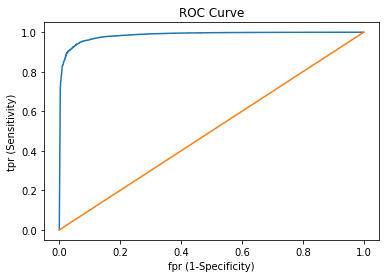

In [45]:
plt.plot(fpr, tpr);
plt.plot([0,1], [0,1]);
plt.title("ROC Curve");
plt.xlabel("fpr (1-Specificity)");
plt.ylabel("tpr (Sensitivity)");

### Congratulations! You have completed all assignments in this week. The question below is optional. If you still have time, why don't try it out.

## Option:

#### Try differnt machine learning algorithms with different combinations of parameters in the practical part, and compare their performances (Better use some visualization techiniques).